<a href="https://colab.research.google.com/github/22041325-sketch/MachineLearning/blob/main/Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Cargar Datos ##


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Cargar los Datos
df=pd.read_csv("autos2.csv")
# Mostrar las primeras filas
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## 2. Definir variables predictoras y variable objetivo ##

In [2]:
x= df[['horsepower','engine-size','city-mpg','wheel-base','bore']]
y= df['price']

## 3. Dividir en conjunto de entrenamiento y prueba ##*texto en cursiva*

In [3]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## 4. Entrenar el modelo de regresion lineal simple ##

In [4]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 5. Evaluar el modelo ##

In [5]:
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadratico medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinacion (R^2): {r2:.2f}")

Error cuadratico medio (MSE): 31610677.23
Coeficiente de determinacion (R^2): 0.74


In [6]:
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse)
print(f"Raiz del error cuadratico medio (RMSE): {rmse:.2f}")


Raiz del error cuadratico medio (RMSE): 5622.34


## 6. Coeficientes del modelo ##

In [7]:
coef_df= pd.DataFrame({
    'Variable': x.columns,
    'Coeficiente': model.coef_
})
print(coef_df)
print(f"Interseccion(bias): {model.intercept_:.2f}")

      Variable  Coeficiente
0   horsepower    47.316135
1  engine-size    85.738718
2     city-mpg   -94.052553
3   wheel-base   263.370535
4         bore -1099.578480
Interseccion(bias): -22914.90


##7. Comparar precios reales vs predichos. ##

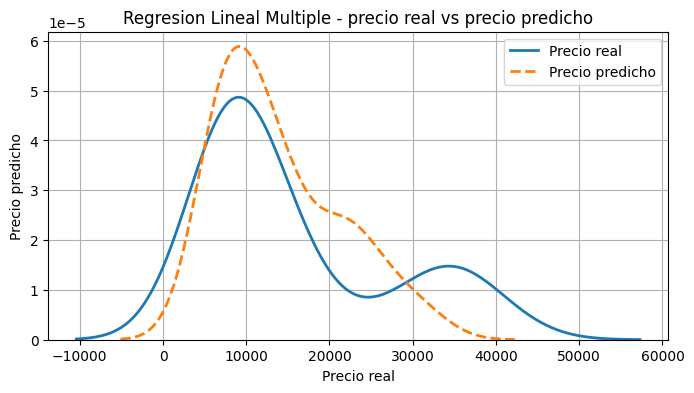

In [8]:
plt.figure(figsize=(8, 4))
sns.kdeplot(y_test, label='Precio real',linewidth=2)
sns.kdeplot(y_pred, label='Precio predicho',linewidth=2,linestyle='--')
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Regresion Lineal Multiple - precio real vs precio predicho')
plt.grid (True)
plt.legend()
plt.show()

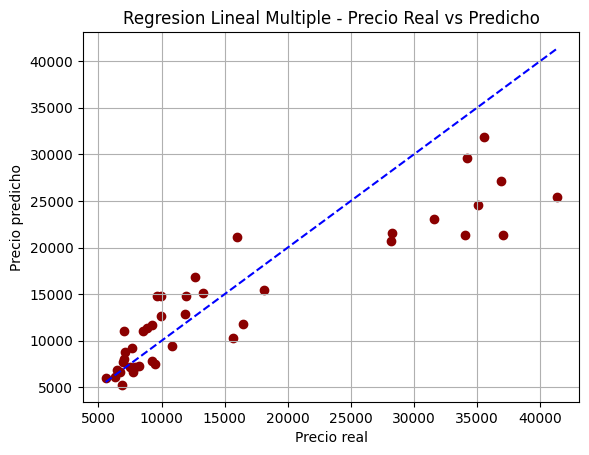

In [9]:
plt.scatter(y_test, y_pred, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--') #Linea ideal
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title("Regresion Lineal Multiple - Precio Real vs Predicho")
plt.grid(True)
plt.show()